# R로 날씨분석데이터 활용 EDA와 통계 모델링 분석

In [1]:
data <- read.csv('C:/Users/test/Desktop/날씨빅데이터/aws_acci_data.csv', header=TRUE)
head(data)
colnames(data) <- c('지점일시', '지점', '일시', '온도', '풍향', '풍속', '강수량', '습도', '사고유무')
str(data)

X............,X......,X.......1,X8h_celsius,X8h_windD,X8h_windV,X8h_precipitaiton,X8h_humidity,X..................
4.11202e+12,411,2017010205,5.3875,110.7625,1.8750,0.0000,68.9375,1
4.01202e+12,401,2017062712,24.7625,141.5750,1.4125,0.0000,0.0000,1
4.03202e+12,403,2017111901,-2.3750,305.7000,3.3625,0.0000,0.0000,1
4.06202e+12,406,2017090120,26.2875,245.4125,1.1500,0.0000,50.3500,1
4.12202e+12,412,2017090419,26.4375,147.9375,1.3375,0.0000,0.0000,1
4.00202e+12,400,2017070803,26.2500,219.2125,1.7500,0.9375,93.2500,1


'data.frame':	5990 obs. of  9 variables:
 $ 지점일시: num  4.11e+12 4.01e+12 4.03e+12 4.06e+12 4.12e+12 ...
 $ 지점    : int  411 401 403 406 412 400 405 400 411 424 ...
 $ 일시    : int  2017010205 2017062712 2017111901 2017090120 2017090419 2017070803 2017100201 2017070801 2017111409 2017022711 ...
 $ 온도    : num  5.39 24.76 -2.38 26.29 26.44 ...
 $ 풍향    : num  111 142 306 245 148 ...
 $ 풍속    : num  1.88 1.41 3.36 1.15 1.34 ...
 $ 강수량  : num  0 0 0 0 0 ...
 $ 습도    : num  68.9 0 0 50.4 0 ...
 $ 사고유무: int  1 1 1 1 1 1 1 1 1 1 ...


In [2]:
attach(data)
tmp <- cbind(사고유무, 온도, 풍향, 풍속, 강수량, 습도)
head(tmp)

사고유무,온도,풍향,풍속,강수량,습도
1,5.3875,110.7625,1.8750,0.0000,68.9375
1,24.7625,141.5750,1.4125,0.0000,0.0000
1,-2.3750,305.7000,3.3625,0.0000,0.0000
1,26.2875,245.4125,1.1500,0.0000,50.3500
1,26.4375,147.9375,1.3375,0.0000,0.0000
1,26.2500,219.2125,1.7500,0.9375,93.2500


In [4]:
set.seed(9876)
n <- nrow(tmp)
idx <- 1:n
training_idx <- sample(idx, n*.60)
idx <- setdiff(idx, training_idx)
test_idx <- sample(idx, n*.40)


In [5]:
train <- tmp[training_idx,]
test <- tmp[test_idx,]

head(train)
head(test)

사고유무,온도,풍향,풍속,강수량,습도
0,27.3125,264.1875,2.0750,0,78.550
1,5.6250,230.3625,1.0000,0,0.000
1,30.7250,195.4500,1.9750,0,0.000
0,23.2375,159.6250,2.1375,0,60.950
1,7.3250,118.5500,0.4250,0,0.000
1,24.6750,203.8250,1.3000,0,75.125


사고유무,온도,풍향,풍속,강수량,습도
0,18.7000,259.7375,1.4250,0.0000,65.350
1,-2.5500,283.4625,1.5750,0.0000,39.550
0,0.7125,242.0750,2.2375,0.0625,0.000
0,16.1000,122.7625,3.1375,0.0000,68.025
0,7.1250,274.7875,2.6750,0.0000,0.000
1,24.0000,118.0625,1.7625,0.3125,90.425


Installing package into 'C:/Users/test/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\test\AppData\Local\Temp\RtmpGkgPLL\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.4.4"corrplot 0.84 loaded


,사고유무,온도,풍향,풍속,강수량,습도
사고유무,1.000,-0.287,-0.071,-0.242,-0.016,-0.257
온도,-0.287,1.000,-0.144,-0.028,0.133,0.467
풍향,-0.071,-0.144,1.000,0.361,-0.080,-0.137
풍속,-0.242,-0.028,0.361,1.000,0.032,0.001
강수량,-0.016,0.133,-0.080,0.032,1.000,0.189
습도,-0.257,0.467,-0.137,0.001,0.189,1.000


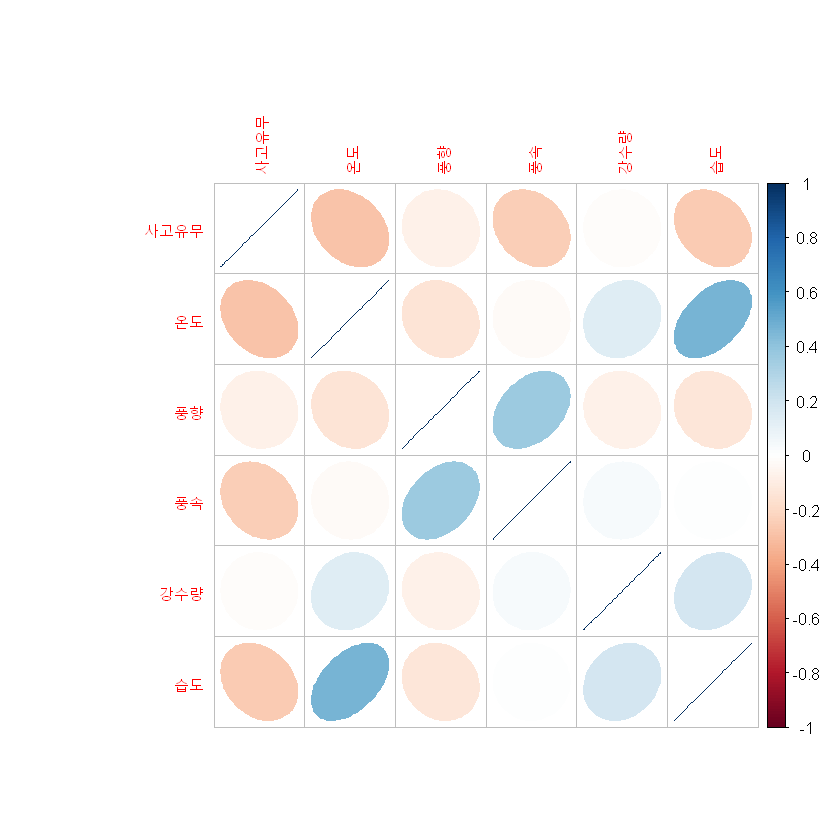

In [8]:
#상관분석 - 온도 > 습도 > 풍속
#온도가 낮을 수록 습도가 낮을 수록 풍속이 낮을 수록 음주사고가 난다인데... 별 도움이 안됑 

install.packages('corrplot', repos='http://cran.rstudio.com/')
library(corrplot)
tmp <- scale(tmp)

cor_data <- round(cor(tmp),3)
cor_data

corrplot(cor_data, method='ellipse')


In [10]:
tmp <- as.data.frame(tmp)

In [11]:
#선형회귀모형 - 종속변수의 예측값이 수치값의 결과물을 원할 때
#Adjusted R-squared 가 16프로 즉, 신뢰 가능성이 낮음
lm_acc <- lm(사고유무 ~., data=tmp)
summary(lm_acc)


Call:
lm(formula = 사고유무 ~ ., data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9299 -0.7384 -0.2739  0.8417  2.2639 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.063e-17  1.180e-02   0.000  1.00000    
온도        -2.283e-01  1.341e-02 -17.025  < 2e-16 ***
풍향        -3.664e-02  1.286e-02  -2.848  0.00441 ** 
풍속        -2.371e-01  1.269e-02 -18.689  < 2e-16 ***
강수량       5.050e-02  1.207e-02   4.186 2.88e-05 ***
습도        -1.650e-01  1.352e-02 -12.200  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.913 on 5984 degrees of freedom
Multiple R-squared:  0.1671,	Adjusted R-squared:  0.1664 
F-statistic: 240.2 on 5 and 5984 DF,  p-value: < 2.2e-16


In [14]:
head(train)

train <- as.data.frame(train)
attach(train)
glm_acc <- glm(사고유무 ~ 온도+풍향+풍속+강수량+습도, family='binomial')

사고유무,온도,풍향,풍속,강수량,습도
0,27.3125,264.1875,2.0750,0,78.550
1,5.6250,230.3625,1.0000,0,0.000
1,30.7250,195.4500,1.9750,0,0.000
0,23.2375,159.6250,2.1375,0,60.950
1,7.3250,118.5500,0.4250,0,0.000
1,24.6750,203.8250,1.3000,0,75.125


The following objects are masked from data:

    강수량, 사고유무, 습도, 온도, 풍속, 풍향



In [15]:
#Null deviance와 residual deviance의 차이: Null 모델과 비교하여 해당 변수가 모델에 
# 포함 되었을 때 모델의 성능이 얼마나 나아지
#Deviance Residuals을 통해 model fitting이 잘되어있는지에 대한 측정이다. 
summary(glm_acc)



Call:
glm(formula = 사고유무 ~ 온도 + 풍향 + 풍속 + 강수량 + 습도, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1310  -0.9216  -0.5742   1.0134   2.4987  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.5691292  0.1488019  17.265  < 2e-16 ***
온도        -0.0489627  0.0038690 -12.655  < 2e-16 ***
풍향        -0.0012815  0.0005485  -2.336 0.019474 *  
풍속        -0.6368677  0.0474691 -13.416  < 2e-16 ***
강수량       0.1249676  0.0378825   3.299 0.000971 ***
습도        -0.0109802  0.0011990  -9.158  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4962.6  on 3593  degrees of freedom
Residual deviance: 4292.2  on 3588  degrees of freedom
AIC: 4304.2

Number of Fisher Scoring iterations: 4


In [16]:
#AIC를 통해도 알 수 있듯이 glm_acc모델이 더 좋음을 알 수 있다.
AIC(lm_acc, glm_acc)


Warning message in AIC.default(lm_acc, glm_acc):
"models are not all fitted to the same number of observations"

,df,AIC
lm_acc,7,15916.335
glm_acc,6,4304.165
